# HMEQ Dataset : Build and Import Tensorflow Keras Models into SAS Model Manager

This notebook provides an example of how to build and train a simple Tensorflow Keras model using the HMEQ dataset, and then import the model into SAS Model Manager. Lines of code that must be modified by the user are noted with the comment "_Changes required by user._".

_**Note:** If you download only this notebook and not the rest of the repository, you must also download the hmeq.csv file from the data folder in the examples directory. These files are used when executing this notebook example._

### Python Package Imports

In [1]:
# Standard Library
from pathlib import Path
import warnings

# Third Party
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Application Specific
import sasctl.pzmm as pzmm
from sasctl import Session

2023-04-26 04:15:28.786693: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Import and Review Data Set

In [2]:
hmeq_data = pd.read_csv("data/hmeq.csv", sep= ",")
hmeq_data.shape

(5960, 13)

In [3]:
hmeq_data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,26800,46236.0,62711.0,DebtCon,Office,17.0,0.0,0.0,175.075058,1.0,22.0,33.059934
1,0,26900,74982.0,126972.0,DebtCon,Office,0.0,0.0,0.0,315.818911,0.0,23.0,38.325990
2,0,26900,67144.0,92923.0,DebtCon,Other,16.0,0.0,0.0,89.112173,1.0,17.0,32.791478
3,0,26900,45763.0,73797.0,DebtCon,Other,23.0,NaN,0.0,291.591681,1.0,29.0,39.370858
4,0,27000,144901.0,178093.0,DebtCon,ProfExe,7.0,0.0,0.0,331.113972,0.0,34.0,40.566552


array([[<Axes: title={'center': 'BAD'}>,
        <Axes: title={'center': 'LOAN'}>,
        <Axes: title={'center': 'MORTDUE'}>,
        <Axes: title={'center': 'VALUE'}>],
       [<Axes: title={'center': 'YOJ'}>,
        <Axes: title={'center': 'DEROG'}>,
        <Axes: title={'center': 'DELINQ'}>,
        <Axes: title={'center': 'CLAGE'}>],
       [<Axes: title={'center': 'NINQ'}>,
        <Axes: title={'center': 'CLNO'}>,
        <Axes: title={'center': 'DEBTINC'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

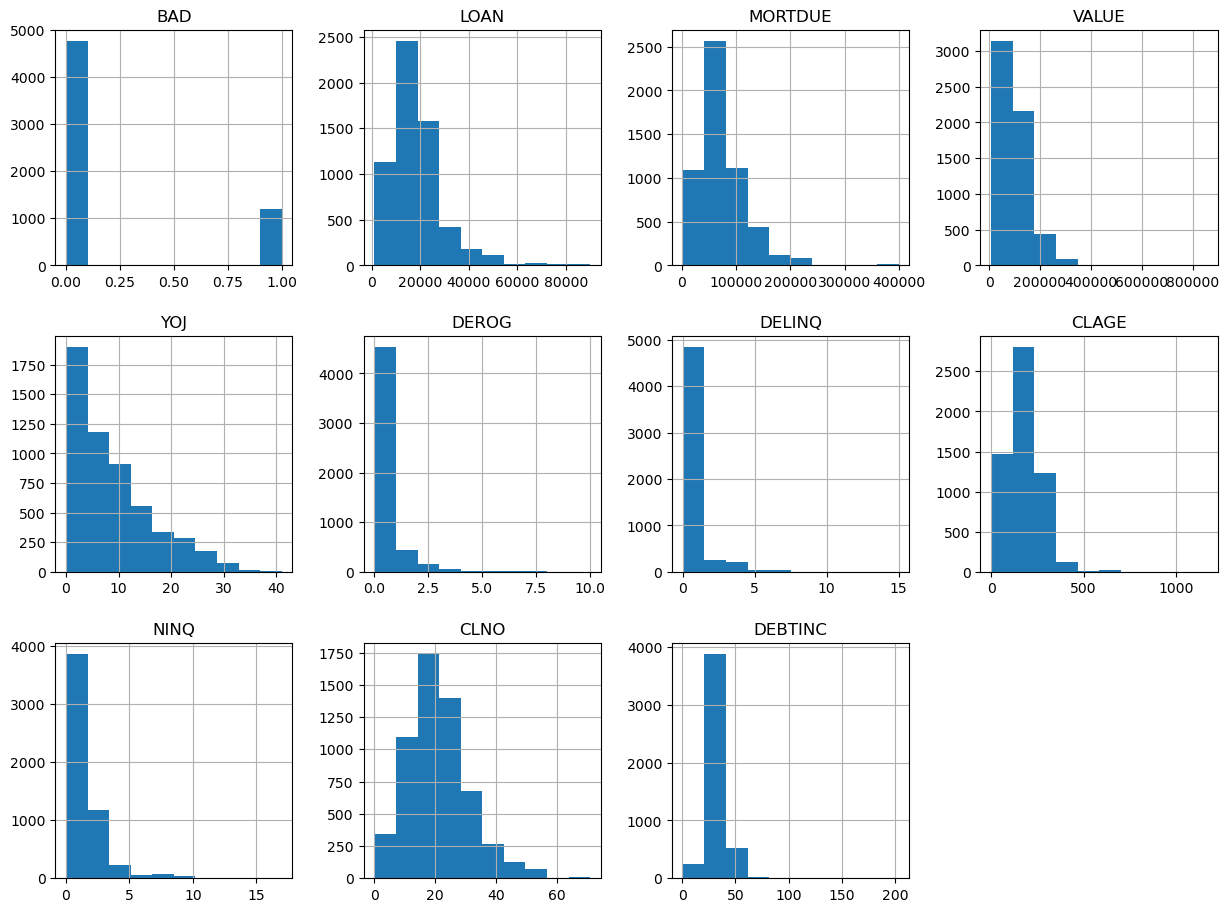

In [4]:
hmeq_data.hist(figsize=(15,15), layout=(4, 4))

In [5]:
hmeq_data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

### Preprocess Data

In [6]:
predictor_columns = ["LOAN", "MORTDUE", "VALUE", "YOJ", "DEROG", "DELINQ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]

target_column = "BAD"
x = hmeq_data[predictor_columns]
y = hmeq_data[target_column]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
# For missing values, impute the data set's mean value
x_test.fillna(x_test.mean(), inplace=True)
x_train.fillna(x_train.mean(), inplace=True)

/var/folders/vs/np2dp7cs1y7ggk5pl92q_rb40000gn/T/ipykernel_5831/1668510498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.fillna(x_test.mean(), inplace=True)
/var/folders/vs/np2dp7cs1y7ggk5pl92q_rb40000gn/T/ipykernel_5831/1668510498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.fillna(x_train.mean(), inplace=True)


### Create, Train, and Assess Model

In [8]:
tf.random.set_seed(42)

# Create a keras model with three Dense layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model, using specified optimizer, loss function, and tracked metrics
model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']   
)

2023-04-26 04:16:12.079246: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Fit the model to the training data
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
131/131 [==============================] - 1s 1ms/step - loss: 509.5638 - accuracy: 0.6764
Epoch 2/100
131/131 [==============================] - 0s 869us/step - loss: 381.1167 - accuracy: 0.6795
Epoch 3/100
131/131 [==============================] - 0s 876us/step - loss: 347.1973 - accuracy: 0.6812
Epoch 4/100
131/131 [==============================] - 0s 748us/step - loss: 321.5358 - accuracy: 0.6925
Epoch 5/100
131/131 [==============================] - 0s 824us/step - loss: 296.5630 - accuracy: 0.6690
Epoch 6/100
131/131 [==============================] - 0s 911us/step - loss: 265.8401 - accuracy: 0.6716
Epoch 7/100
131/131 [==============================] - 0s 763us/step - loss: 247.5690 - accuracy: 0.6788
Epoch 8/100
131/131 [==============================] - 0s 734us/step - loss: 220.0208 - accuracy: 0.6843
Epoch 9/100
131/131 [==============================] - 0s 762us/step - loss: 214.2372 - accuracy: 0.6750
Epoch 10/100
131/131 [==============================] - 0

In [10]:
# Evaluate model using test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(loss)
print(accuracy)

0.6795541048049927
0.8098434209823608


In [11]:
model_predict = model.predict(x_test)

56/56 [==============================] - 0s 580us/step


### Register Model in SAS Model Manager with pzmm

In [13]:
# Model name within SAS Model Manager
model_prefix = 'tfmodel'
# Directory location of the model file. If this notebook is downloaded alone, ensure that the folder exists.
path = Path.cwd() / "data/hmeqModels/KerasModel/"
score_metrics = ["EM_CLASSIFICATION", "EM_EVENTPROBABILITY"]

# Make sure model is saved in the .h5 format
model.save('./data/hmeqModels/KerasModel/tfmodel.h5')

In [14]:
pzmm.JSONFiles.write_var_json(
    # Write input variable mapping to a json file
    input_data=hmeq_data[predictor_columns],
    is_input=True,
    json_path=path)

# Set output variables and assign an event threshold, then write output variable mapping
output_var = pd.DataFrame(columns=score_metrics, data=[["A", 0.5]]) # data argument includes example expected types for outputs
pzmm.JSONFiles.write_var_json(
    output_var,
    is_input=False, 
    json_path=path
)
    
# Write model properties to a json file
pzmm.JSONFiles.write_model_properties_json(
    model_name=model_prefix,
    target_variable=target_column, # Target variable to make predictions about (BAD in this case)
    target_values=["1", "0"], # Possible values for the target variable (1 or 0 for binary classification of BAD)
    json_path=path,
    model_desc=f"Description for the {model_prefix} model",
    model_algorithm="",
    modeler="sasdemo"
)

# Write model metadata to a json file so that SAS Model Manager can properly identify all model files
pzmm.JSONFiles.write_file_metadata_json(model_prefix=model_prefix, 
                                        json_path=path, 
                                        is_tf_keras_model=True)

inputVar.json was successfully written and saved to python-sasctl/examples/data/hmeqModels/KerasModel/inputVar.json
outputVar.json was successfully written and saved to python-sasctl/examples/data/hmeqModels/KerasModel/outputVar.json
ModelProperties.json was successfully written and saved to python-sasctl/examples/data/hmeqModels/KerasModel/ModelProperties.json
fileMetadata.json was successfully written and saved to python-sasctl/examples/data/hmeqModels/KerasModel/fileMetadata.json


In [ ]:
import getpass

username = getpass.getpass()
password = getpass.getpass()
host = "demo.sas.com" # Change required by user
sess = Session(host, username, password, protocol="http") # For TLS-enabled servers, change protocol value to "https"
conn = sess.as_swat() # Connect to SWAT through the sasctl authenticated connection

In [ ]:
pzmm.ImportModel.import_model(
   model_files=path, # Where are the model files?
   model_prefix=model_prefix, # What is the model name?
   project="TFModel", # What is the project name?
   input_data=x, # What does example input data look like?
   predict_method=[model.predict, [int, int]], # What is the predict method and what does it return?
   overwrite_model=True, # Overwrite model if it arleady exists
   target_values=["0", "1"], # What are the expecte values of the target variable?
   score_metrics=score_metrics, # What are the output variables?
   model_file_name = model_prefix + ".h5", # How was the model file serialized?
   missing_values = True, # Does the data include missing values?
   tf_keras_model = True # Tells pzmm that this model is a tensorflow keras model
)